In [ ]:
from models.semisup_vae import REVAE
import torch
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
revae = REVAE()
data = torch.load('./data/celeba.pt')

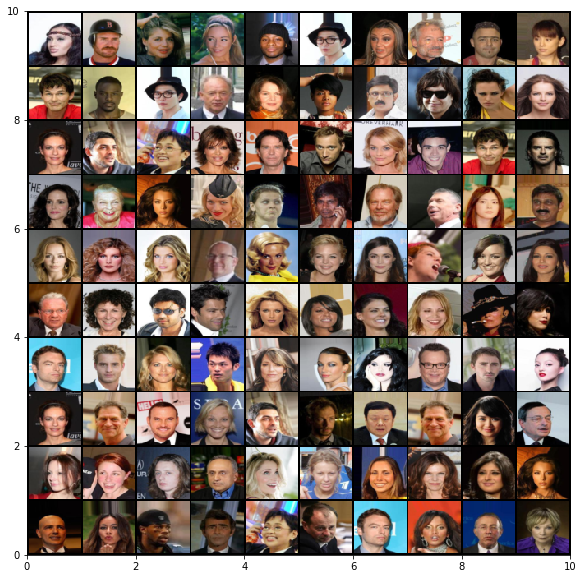

In [3]:
batch = data[np.random.choice(data.size(0), 100)]
grid = make_grid(batch, nrow=10)
fig = plt.figure(figsize=(10, 10))
plt.imshow(grid.permute(1, 2, 0), extent=[0, 10, 0, 10])

In [4]:
coords = input("Enter a comma seperated grid coordinate to obtain an image to intervene on, e.g 2,5:")

Enter a comma seperated grid coordinate to obtain an image to intervene on, e.g 2,5:0,0


<IPython.core.display.Javascript object>


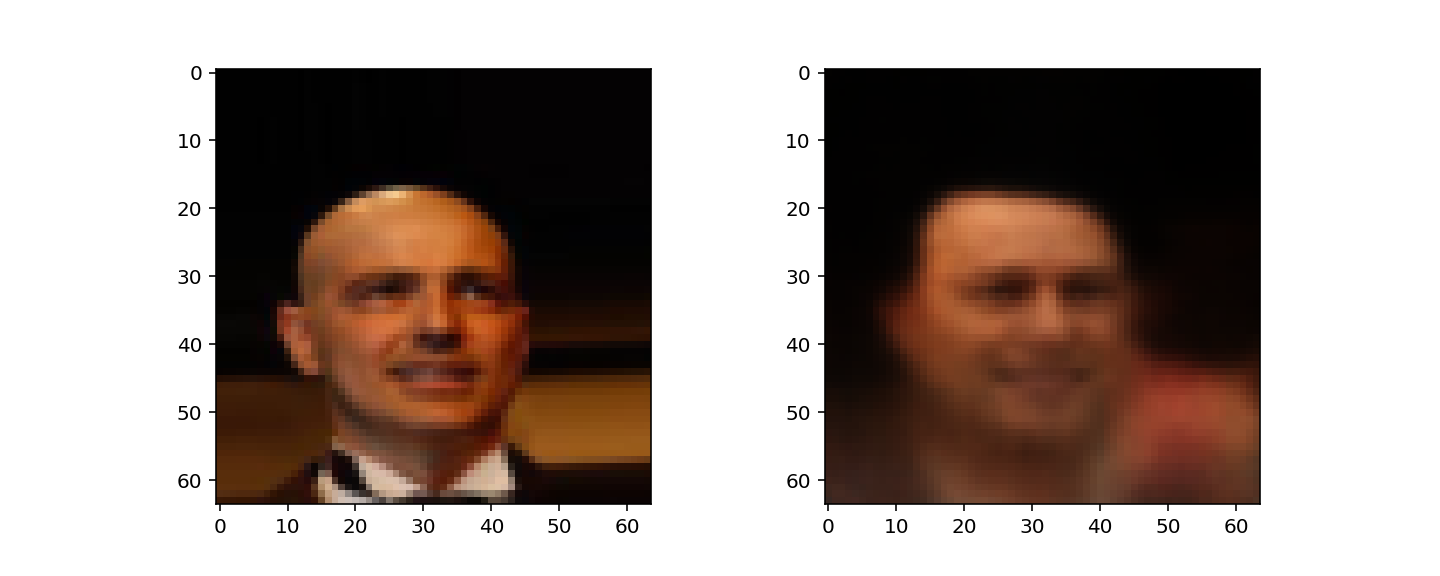

interactive(children=(FloatSlider(value=-16.284761428833008, description='Arched_Eyebrows', max=15.08774948120…

In [6]:
%matplotlib notebook
img = batch[(9 - int(coords[2])) * 10 + int(coords[0])]
recon = revae.reconstruct_img(img.unsqueeze(0))[0].detach()
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img.permute(1, 2, 0))
im = ax2.imshow(recon.permute(1, 2, 0))

# get initial latent value
z = revae._z_prior_fn(*revae.encoder_z(img.unsqueeze(0))).sample()

# define the sliders
widgets = []
for i in range(18):
    widgets.append(FloatSlider(min=revae.lims[i][0], max=revae.lims[i][1], step=1.0, value=z[0, i].item()))


def update(Arched_Eyebrows, Bags_Under_Eyes, Bangs,
         Black_Hair, Blond_Hair, Brown_Hair,
         Bushy_Eyebrows, Chubby, Eyeglasses,
         Heavy_Makeup, Male, No_Beard,
         Pale_Skin, Receding_Hairline, Smiling,
         Wavy_Hair, Wearing_Necktie, Young):
    """
    Update the latent values and then reconstruct.
    """
    z[0, :18] = torch.tensor([[Arched_Eyebrows, Bags_Under_Eyes, Bangs,
                             Black_Hair, Blond_Hair, Brown_Hair,
                             Bushy_Eyebrows, Chubby, Eyeglasses,
                             Heavy_Makeup, Male, No_Beard,
                             Pale_Skin, Receding_Hairline, Smiling,
                             Wavy_Hair, Wearing_Necktie, Young]])
    with torch.no_grad():
        img = revae.decoder(z).squeeze()
    im.set_data(img.permute(1, 2, 0))
    fig.canvas.draw()
    fig.canvas.flush_events()
    

interact(update, 
         Arched_Eyebrows=widgets[0], Bags_Under_Eyes=widgets[1], Bangs=widgets[2],
         Black_Hair=widgets[3], Blond_Hair=widgets[4], Brown_Hair=widgets[5],
         Bushy_Eyebrows=widgets[6], Chubby=widgets[7], Eyeglasses=widgets[8],
         Heavy_Makeup=widgets[9], Male=widgets[10], No_Beard=widgets[11],
         Pale_Skin=widgets[12], Receding_Hairline=widgets[13], Smiling=widgets[14],
         Wavy_Hair=widgets[15], Wearing_Necktie=widgets[16], Young=widgets[17]);

In [ ]:
import plotly.express as px

recon = revae.reconstruct_img(img.unsqueeze(0))[0].detach()


In [ ]:
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img.permute(1, 2, 0))
im = ax2.imshow(recon.permute(1, 2, 0))
